In [1]:
import numpy as np
import pandas as pd
import sys, os, glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='times')
#sns.set(style='whitegrid', font_scale=1.6, font='times')
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
d = pd.read_csv("simulated-cks_results3.csv")
len(d)

5000

In [4]:
outdir = 'check_recovery/'
label = 'simulated-cks3'

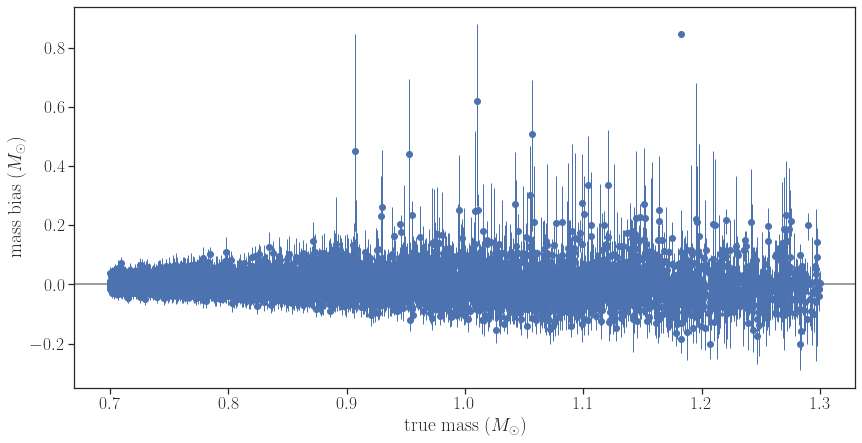

In [5]:
plt.figure(figsize=(14,7))
plt.axhline(y=0, color='gray')
plt.ylabel("mass bias ($M_\odot$)")
plt.xlabel("true mass ($M_\odot$)")
plt.errorbar(d.mass_true, (d.iso_mass-d.mass_true), fmt='o', yerr=[d.iso_mass_low, d.iso_mass_upp], lw=1);

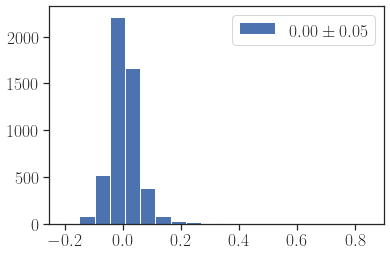

In [6]:
dm = (d.iso_mass-d.mass_true)
plt.hist(dm, label='$%.2f\pm%.2f$'%(np.mean(dm), np.std(dm)), bins=20)
plt.legend();

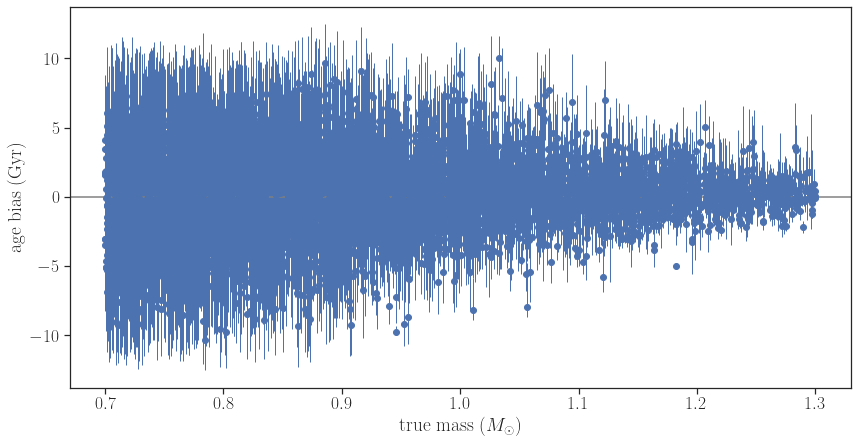

In [7]:
plt.figure(figsize=(14,7))
plt.axhline(y=0, color='gray')
plt.ylabel("age bias (Gyr)")
plt.xlabel("true mass ($M_\odot$)")
plt.errorbar(d.mass_true, d.iso_age-d.age_true, fmt='o', yerr=[d.iso_age_low, d.iso_age_upp], lw=1);

-0.5672812776213932 3.252449986516998


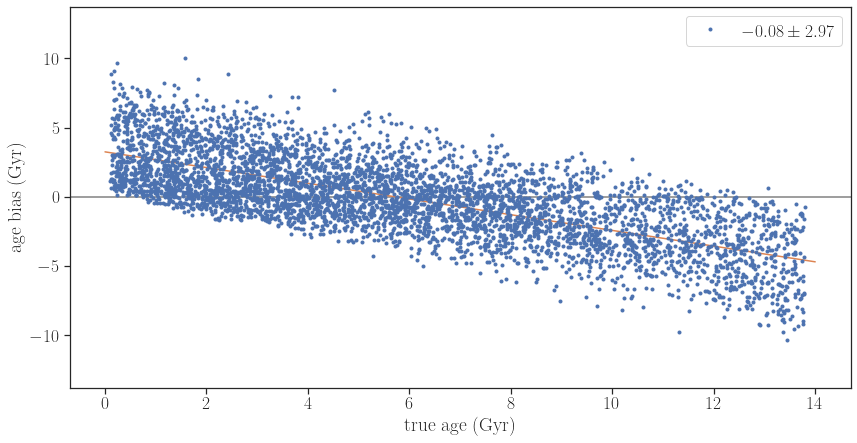

In [8]:
m = 1.
idx = (np.abs(d.mass_true-m)<0.05*100) #& (d.age_true>2)
a, b = np.polyfit(d.age_true[idx], (d.iso_age-d.age_true)[idx], deg=1)
print (a, b)
plt.figure(figsize=(14,7))
#plt.xlim(1., 11.5)
#plt.ylim(-5.5, 5.5)
plt.ylabel('age bias (Gyr)')
plt.xlabel('true age (Gyr)')
plt.axhline(y=0, color='gray')
#for i,m in enumerate(m_centers):
dy = (d.iso_age-d.age_true)
x = d.age_true
#x = d.iso_age
plt.errorbar(x[idx], dy[idx], fmt='.', yerr=[d.iso_age_low[idx], d.iso_age_upp[idx]], lw=0, label='$%.2f\pm%.2f$'%(np.mean(dy[idx]), np.std(dy[idx])))
#plt.plot(x[idx&(d.age_true>6)], dy[idx&(d.age_true>6)], 's', markersize=10)
t0 = np.linspace(0, 14, 100)
plt.plot(t0, a*t0+b)
plt.legend()
plt.savefig(outdir+label+"_age_bias.png", dpi=200, bbox_inches="tight")

In [9]:
from scipy.stats import binned_statistic_2d
mbin = np.arange(0.7, 1.3+1e-6, 0.1)
abin = np.arange(0, 14+1e-6, 2)
cmin = 20

#%% age
astat, _, _, _ = binned_statistic_2d(d.mass_true, d.age_true, d.iso_age-d.age_true, bins=[mbin, abin], statistic='median')
acount, _, _, _ = binned_statistic_2d(d.mass_true, d.age_true, d.iso_age-d.age_true, bins=[mbin, abin], statistic='count')
#stat, _, _, _ = binned_statistic_2d(d.mass_true, d.age_true, d.iso_age-d.age_true, bins=[mbin, abin], statistic='mean')
astat[acount<cmin] = np.nan

#%% mass
mstat, _, _, _ = binned_statistic_2d(d.mass_true, d.age_true, d.iso_mass-d.mass_true, bins=[mbin, abin], statistic='median')
mcount, _, _, _ = binned_statistic_2d(d.mass_true, d.age_true, d.iso_mass-d.mass_true, bins=[mbin, abin], statistic='count')
#stat, _, _, _ = binned_statistic_2d(d.mass_true, d.age_true, d.iso_age-d.age_true, bins=[mbin, abin], statistic='mean')
mstat[mcount<cmin] = np.nan

In [11]:
dast = pd.read_csv("dast.csv")
astidx = (dast.Mass>mbin[0]) & (dast.Mass<mbin[-1])
mast, aast = dast.Mass[astidx], dast.Age[astidx]
midx = np.digitize(mast, mbin) - 1
aidx = np.digitize(aast, abin) - 1
age_biases = astat[midx, aidx]
print ("# expected age bias for seismic stars: %.2f +/- %.2f"%(np.median(age_biases),np.std(age_biases)))

# expected age bias for seismic stars: -0.51 +/- 1.07


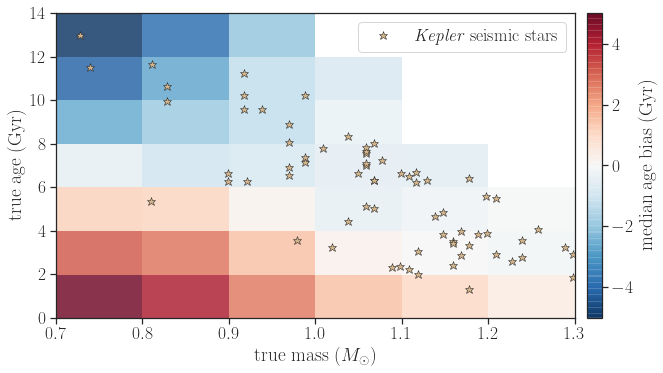

In [12]:
plt.figure(figsize=(14*0.8,7*0.8))
#plt.xlim(1., 11.5)
#plt.ylim(-5.5, 5.5)
plt.xlim(mbin.min(), mbin.max())
plt.ylabel('true age (Gyr)')
plt.xlabel('true mass ($M_\odot$)')
plt.imshow(astat.T, extent=[mbin[0], mbin[-1], abin[0], abin[-1]], aspect='auto', origin='lower', cmap=plt.cm.RdBu_r, alpha=0.8, vmin=-5, vmax=5)
plt.plot(dast.Mass, dast.Age, '*', label=r'\textit{Kepler} seismic stars', color='tan', mec='k', mew=0.5, markersize=9)
#plt.plot(d.iso_mass, d.iso_age, '.', color='k', markersize=1, label='recovered')
#plt.plot(d.mass_true, d.age_true, '.', alpha=0.4, color='k', markersize=1, label='true')
#plt.scatter(d.mass_true, d.age_true, c=d.iso_age-d.age_true, cmap='seismic', vmin=-8, vmax=8)
plt.colorbar(pad=0.02, label='median age bias (Gyr)')
plt.legend()
plt.savefig(outdir+label+"_bias_map.png", dpi=200, bbox_inches="tight")

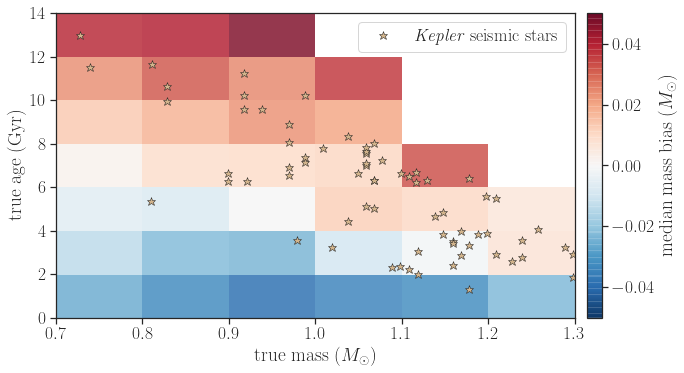

In [13]:
plt.figure(figsize=(14*0.8,7*0.8))
plt.xlim(mbin.min(), mbin.max())
plt.ylabel('true age (Gyr)')
plt.xlabel('true mass ($M_\odot$)')
plt.imshow(mstat.T, extent=[mbin[0], mbin[-1], abin[0], abin[-1]], aspect='auto', origin='lower', cmap=plt.cm.RdBu_r, alpha=0.8, vmin=-0.05, vmax=0.05)
plt.plot(dast.Mass, dast.Age, '*', label=r'\textit{Kepler} seismic stars', color='tan', mec='k', mew=0.5, markersize=9)
#plt.plot(d.iso_mass, d.iso_age, '.', color='k', markersize=1, label='recovered')
#plt.plot(d.mass_true, d.age_true, '.', alpha=0.4, color='k', markersize=1, label='true')
#plt.scatter(d.mass_true, d.age_true, c=d.iso_age-d.age_true, cmap='seismic', vmin=-8, vmax=8)
plt.colorbar(pad=0.02, label='median mass bias ($M_\odot$)')
plt.legend()
plt.savefig(outdir+label+"_mbias_map.png", dpi=200, bbox_inches="tight")

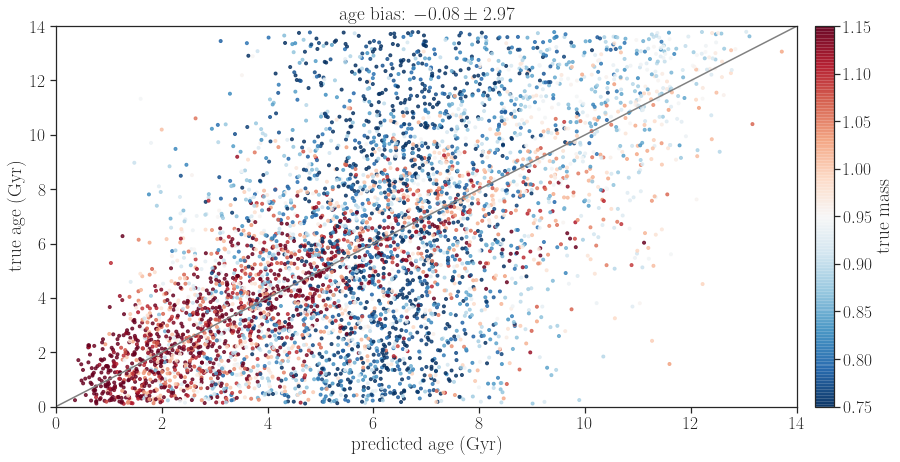

In [14]:
apred = d.iso_age
abias = apred - d.age_true
idx = np.abs(d.mass_true-1.1) < 0.05*100
plt.figure(figsize=(16,7))
plt.xlabel("predicted age (Gyr)")
plt.ylabel("true age (Gyr)")
plt.xlim(0, 14)
plt.ylim(0, 14)
t0 = np.linspace(0, 14, 100)
plt.title("age bias: $%.2f\pm%.2f$"%(np.mean(abias), np.std(abias)))
plt.plot(t0, t0, '-', color='gray')
#plt.plot(apred[idx], d.age_true[idx], 'o', alpha=0.8)
plt.scatter(apred[idx], d.age_true[idx], c=d.mass_true[idx], marker='.', alpha=0.8, vmin=0.75, vmax=1.15, cmap='RdBu_r')
plt.colorbar(pad=0.02, label='true mass')
plt.savefig(outdir+label+"_age_map.png", dpi=200, bbox_inches="tight")